In [1]:
from ipymarkup import show_dep_ascii_markup, show_dep_markup, show_span_box_markup
from ipymarkup.palette import palette, BLUE, RED, GREEN
from razdel import sentenize, tokenize
from navec import Navec
from slovnet import Syntax
from yargy import Parser

In [2]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
import yake
from laserembeddings import Laser

In [96]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
syntax = Syntax.load('slovnet_syntax_news_v1.tar')
syntax.navec(navec)

Syntax(
    infer=SyntaxInfer(
        model=Syntax(
            emb=WordShapeEmbedding(
                word=NavecEmbedding(
                    id='news_v1_1B_250K_300d_100q',
                    indexes=Weight(
                        shape=[250002,
                         100],
                        dtype='uint8',
                        array=array([[176, 222, 248, ..., 244, 183, 191],
                               [215, 200, 168, ..., 120, 217,  21],
                               [ 83, 174,  54, ..., 106,  88, 251],
                               ...,
                               [133, 125, 123, ..., 124,  94,  24],
                               [183,  49, 180, ..., 151, 167,  68],
                               [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
                    ),
                    codes=Weight(
                        shape=[100,
                         256,
                         3],
                        dtype='float32',
                    

In [4]:
!python -m dostoevsky download fasttext-social-network-model

In [5]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [153]:
language = "ru"
max_ngram_size = 5
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 3
numOfKeywords = 20

In [7]:
kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)

In [8]:
!python -m laserembeddings download-models


✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/93langs.fcodes    
✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/93langs.fvocab    
✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/bilstm.93langs.2018-12-26.pt    

✨ You're all set!


In [9]:
laser = Laser()

In [150]:
text = "За последние 10 лет, во втором десятилетии XXI века, рынок стартапов и венчурного инвестирования для многих незаметно, но кардинально изменился. Парадигмой пионеров интернета было создать проект, который изменит интернет к лучшему — «сделать новый Google» (новый Facebook, новый YouTube, новый айфон и так далее). Новой парадигмой стартапера, задумывающегося о своём вкладе в интернет, вступившей в силу в последнее десятилетие, стало создать проект, который будет куплен «Гуглом», «Фейсбуком», Apple (или «Яндексом» или Mail.ru в случае Рунета). Об изменении мира или хотя бы интернета речи уже не идёт — мир уже изменился, а в процессе был открыт, изучен и поделён. Все точки входа и торговые пути под контролем выросших за первые два десятилетия XXI века империй, и новоприбывающим колонистам ничего не остаётся, кроме как выбирать, флагу какой из них присягнуть. Для многих людей, включая автора этих строк, заставших нынешние интернет-империи «в коротких штанишках», когда мы дышали с ними одним воздухом интернет-вольницы, а «Гугл» ещё верил в свой девиз Don't be evil, произошедшее преображение оказалось неприятным, болезненным и неожиданным поворотом. И — отрезвляющим. Но, на самом деле, за последние 10 лет не произошло совершенно ничего нового."
#text = "Минтранс предложил оснастить автомобили сервисов такси устройствами для контроля сонливости водителей. Об этом говорится в проекте федерального закона «О такси», размещённого на сайте проектов нормативно-правовых актов. Законопроект предусматривает, чтобы кузов такси окрашивали по схеме из квадратов контрастных цветов в шахматном порядке. При этом цветовая гамма должна «соответствовать стандартам региона». На крыше автомобиля необходимо размещать опознавательный фонарь оранжевого цвета. Если проект примут, он вступит в силу 1 сентября 2022 года. Действующие ПДД разрешают водителю находиться за рулём суммарно не более десяти часов. Контролируют это с помощью тахографов. Штраф для нарушителей — до 2,5 тысяч рублей."

In [119]:
chunk = []
sentences = []
for sent in sentenize(text):
    sentence = {}
    sentence['text'] = sent.text
    sentence['span'] = (sent.start, sent.stop)
    sentences.append(sentence)
    tokens = [_.text for _ in tokenize(sent.text)]
    chunk.append(tokens)
chunk[:1]

[['За',
  'последние',
  '10',
  'лет',
  ',',
  'во',
  'втором',
  'десятилетии',
  'XXI',
  'века',
  ',',
  'рынок',
  'стартапов',
  'и',
  'венчурного',
  'инвестирования',
  'для',
  'многих',
  'незаметно',
  ',',
  'но',
  'кардинально',
  'изменился',
  '.']]

In [120]:
markup = next(syntax.map(chunk))

In [121]:
# Convert CoNLL-style format to source, target indices
words, deps = [], []
for token in markup.tokens:
    words.append(token.text)
    source = int(token.head_id) - 1
    target = int(token.id) - 1
    if source > 0 and source != target:  # skip root, loops
        deps.append([source, target, token.rel])
show_dep_ascii_markup(words, deps)

      ┌────► За             case
      │   ┌► последние      amod
      │ ┌►└─ 10             nummod
      └─└─── лет            
      ┌────► ,              punct
      │ ┌──► во             case
      │ │ ┌► втором         amod
┌────►└─└─└─ десятилетии    conj
│     │   ┌► XXI            amod
│     └──►└─ века           nmod
│         ┌► ,              punct
│ ┌────►┌─└─ рынок          conj
│ │   ┌─└──► стартапов      nmod
│ │   │ ┌──► и              cc
│ │   │ │ ┌► венчурного     amod
│ │ ┌─└►└─└─ инвестирования conj
│ │ │     ┌► для            case
│ │ │   ┌►└─ многих         obl
└─└─└──►└─── незаметно      advmod
      ┌────► ,              punct
      │ ┌──► но             cc
      │ │ ┌► кардинально    advmod
      └─└─└─ изменился      
        └──► .              punct


In [122]:
show_dep_markup(words, deps)

In [123]:
sentences

[{'text': 'За последние 10 лет, во втором десятилетии XXI века, рынок стартапов и венчурного инвестирования для многих незаметно, но кардинально изменился.',
  'span': (0, 144)},
 {'text': 'Парадигмой пионеров интернета было создать проект, который изменит интернет к лучшему — «сделать новый Google» (новый Facebook, новый YouTube, новый айфон и так далее).',
  'span': (145, 313)},
 {'text': 'Новой парадигмой стартапера, задумывающегося о своём вкладе в интернет, вступившей в силу в последнее десятилетие, стало создать проект, который будет куплен «Гуглом», «Фейсбуком», Apple (или «Яндексом» или Mail.ru в случае Рунета).',
  'span': (314, 546)},
 {'text': 'Об изменении мира или хотя бы интернета речи уже не идёт — мир уже изменился, а в процессе был открыт, изучен и поделён.',
  'span': (547, 667)},
 {'text': 'Все точки входа и торговые пути под контролем выросших за первые два десятилетия XXI века империй, и новоприбывающим колонистам ничего не остаётся, кроме как выбирать, флагу какой

In [124]:
df_texts = pd.DataFrame(sentences)

In [125]:
df_texts

,text,span
0,"За последние 10 лет, во втором десятилетии XXI...","(0, 144)"
1,Парадигмой пионеров интернета было создать про...,"(145, 313)"
2,"Новой парадигмой стартапера, задумывающегося о...","(314, 546)"
3,Об изменении мира или хотя бы интернета речи у...,"(547, 667)"
4,Все точки входа и торговые пути под контролем ...,"(668, 866)"
5,"Для многих людей, включая автора этих строк, з...","(867, 1160)"
6,И — отрезвляющим.,"(1161, 1178)"
7,"Но, на самом деле, за последние 10 лет не прои...","(1179, 1256)"


In [126]:
sent_texts = list(df_texts['text'])

In [127]:
sent_texts

['За последние 10 лет, во втором десятилетии XXI века, рынок стартапов и венчурного инвестирования для многих незаметно, но кардинально изменился.',
 'Парадигмой пионеров интернета было создать проект, который изменит интернет к лучшему — «сделать новый Google» (новый Facebook, новый YouTube, новый айфон и так далее).',
 'Новой парадигмой стартапера, задумывающегося о своём вкладе в интернет, вступившей в силу в последнее десятилетие, стало создать проект, который будет куплен «Гуглом», «Фейсбуком», Apple (или «Яндексом» или Mail.ru в случае Рунета).',
 'Об изменении мира или хотя бы интернета речи уже не идёт — мир уже изменился, а в процессе был открыт, изучен и поделён.',
 'Все точки входа и торговые пути под контролем выросших за первые два десятилетия XXI века империй, и новоприбывающим колонистам ничего не остаётся, кроме как выбирать, флагу какой из них присягнуть.',
 "Для многих людей, включая автора этих строк, заставших нынешние интернет-империи «в коротких штанишках», когда 

In [128]:
results = model.predict(sent_texts)

In [129]:
delta = 0.1

pos_c = 0
neu_c = 0
neg_c = 0

spans = []
for sentence, sentiment in zip(sentences, results):
    print(sentence['text'], '\n', sentiment, '\n')
    main_sentiment = ''
    if sentiment['negative'] > sentiment['positive']:
        main_sentiment = 'Negative'
        neg_c += 1
    if sentiment['positive'] > sentiment['negative']:
        main_sentiment = 'Positive'
        pos_c += 1
    if abs(sentiment['positive'] - sentiment['negative']) < delta:
        main_sentiment = 'Neutral'
        neu_c += 1
    if main_sentiment != '':
        spans.append(sentence['span'] + (main_sentiment,))
mean_c = len(spans)
error = mse([pos_c, neu_c, neg_c], [mean_c/3, mean_c/3, mean_c/3])

За последние 10 лет, во втором десятилетии XXI века, рынок стартапов и венчурного инвестирования для многих незаметно, но кардинально изменился. 
 {'neutral': 0.8221991658210754, 'positive': 0.09535945951938629, 'skip': 0.05835584178566933, 'negative': 0.05034062638878822, 'speech': 0.006498271133750677} 

Парадигмой пионеров интернета было создать проект, который изменит интернет к лучшему — «сделать новый Google» (новый Facebook, новый YouTube, новый айфон и так далее). 
 {'neutral': 0.8080772161483765, 'positive': 0.14805719256401062, 'negative': 0.042097724974155426, 'skip': 0.040855713188648224, 'speech': 0.0023331623524427414} 

Новой парадигмой стартапера, задумывающегося о своём вкладе в интернет, вступившей в силу в последнее десятилетие, стало создать проект, который будет куплен «Гуглом», «Фейсбуком», Apple (или «Яндексом» или Mail.ru в случае Рунета). 
 {'neutral': 0.812877357006073, 'negative': 0.11597072333097458, 'skip': 0.09535945951938629, 'positive': 0.025188844650983

In [130]:
print(delta, error)

0.1 3.8888888888888893


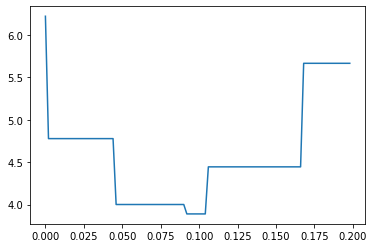

In [110]:
x = []
y = []
n = 100
for i in range(n):
    delta = (0.2/n)*i

    pos_c = 0
    neu_c = 0
    neg_c = 0

    spans = []
    for sentence, sentiment in zip(sentences, results):
        main_sentiment = ''
        if sentiment['negative'] > sentiment['positive']:
            main_sentiment = 'Negative'
            neg_c += 1
        if sentiment['positive'] > sentiment['negative']:
            main_sentiment = 'Positive'
            pos_c += 1
        if abs(sentiment['positive'] - sentiment['negative']) < delta:
            main_sentiment = 'Neutral'
            neu_c += 1
        if main_sentiment != '':
            spans.append(sentence['span'] + (main_sentiment,))
    mean_c = len(spans)
    error = mse([pos_c, neu_c, neg_c], [mean_c/3, mean_c/3, mean_c/3])
    x.append(delta)
    y.append(error)

plt.plot(x, y)

In [131]:
spans

[(0, 144, 'Neutral'),
 (145, 313, 'Positive'),
 (314, 546, 'Neutral'),
 (547, 667, 'Negative'),
 (668, 866, 'Negative'),
 (867, 1160, 'Negative'),
 (1161, 1178, 'Neutral'),
 (1179, 1256, 'Negative')]

In [132]:
show_span_box_markup(text, spans, palette=palette(RED, GREEN, BLUE))

In [133]:
embeddings = laser.embed_sentences(sent_texts, lang='ru')

In [134]:
print(embeddings)

[[ 4.6252772e-02  1.7248340e-02  9.9386042e-04 ...  8.7295314e-03
   1.0207999e-02  3.9569914e-02]
 [ 9.2257373e-03  8.3608730e-03 -5.8292433e-05 ...  6.2809736e-03
   1.0596171e-02  1.4854523e-02]
 [ 2.9272931e-03  5.8214928e-06 -6.4003031e-04 ...  1.6259423e-02
   1.8488145e-02  2.6931809e-02]
 ...
 [ 1.8783106e-03  1.7466331e-02 -2.9197143e-04 ...  1.1651032e-02
   1.7990047e-02  3.3123348e-02]
 [ 4.9721180e-03  1.1791378e-02  1.4263615e-03 ...  8.6023249e-03
   2.2368008e-02  7.3309974e-03]
 [ 4.1321996e-03  1.9883480e-02 -4.2124214e-03 ...  7.7291657e-03
   1.6427902e-03  2.2220301e-02]]


In [135]:
pca = PCA(n_components=2)

In [136]:
principalComponents = pca.fit_transform(embeddings)

In [137]:
df = pd.DataFrame(principalComponents, columns=['c1', 'c2'])

In [138]:
df

,c1,c2
0,0.060335,0.250918
1,-0.246348,-0.226301
2,-0.335658,-0.137858
3,0.006677,-0.027755
4,-0.016864,0.294097
5,-0.197701,0.101370
6,0.357820,-0.188333
7,0.371739,-0.066138


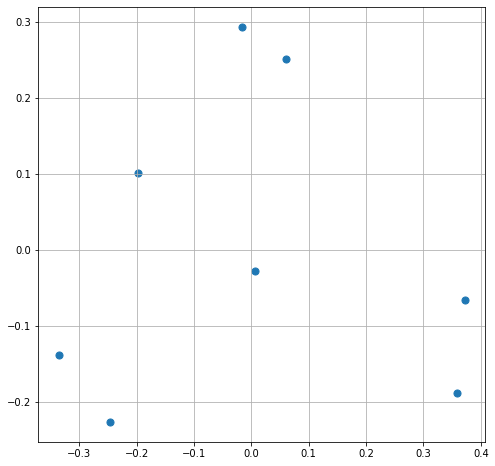

In [139]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.scatter(df['c1'], df['c2'], s = 50)
ax.grid()

In [140]:
df1 = pd.DataFrame(spans, columns=['start', 'stop', 'sentiment'])
df1

,start,stop,sentiment
0,0,144,Neutral
1,145,313,Positive
2,314,546,Neutral
3,547,667,Negative
4,668,866,Negative
5,867,1160,Negative
6,1161,1178,Neutral
7,1179,1256,Negative


In [141]:
df_texts1 = df_texts.join(df)

In [142]:
df_texts2 = df_texts1.join(df1)

In [143]:
df_texts2

,text,span,c1,c2,start,stop,sentiment
0,"За последние 10 лет, во втором десятилетии XXI...","(0, 144)",0.060335,0.250918,0,144,Neutral
1,Парадигмой пионеров интернета было создать про...,"(145, 313)",-0.246348,-0.226301,145,313,Positive
2,"Новой парадигмой стартапера, задумывающегося о...","(314, 546)",-0.335658,-0.137858,314,546,Neutral
3,Об изменении мира или хотя бы интернета речи у...,"(547, 667)",0.006677,-0.027755,547,667,Negative
4,Все точки входа и торговые пути под контролем ...,"(668, 866)",-0.016864,0.294097,668,866,Negative
5,"Для многих людей, включая автора этих строк, з...","(867, 1160)",-0.197701,0.101370,867,1160,Negative
6,И — отрезвляющим.,"(1161, 1178)",0.357820,-0.188333,1161,1178,Neutral
7,"Но, на самом деле, за последние 10 лет не прои...","(1179, 1256)",0.371739,-0.066138,1179,1256,Negative


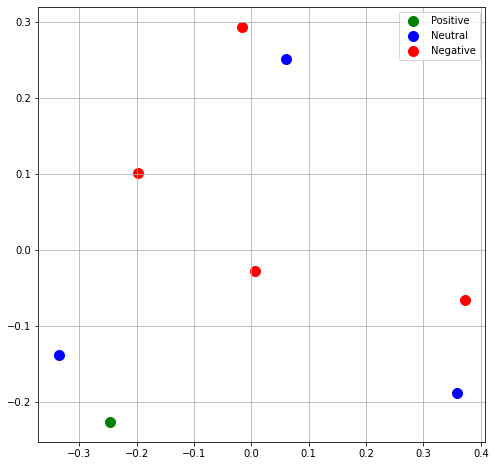

In [144]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['Positive', 'Neutral', 'Negative']
colors = ['g', 'b', 'r']

for target, color in zip(targets,colors):
    indicesToKeep = df_texts2['sentiment'] == target
    ax.scatter(df_texts2.loc[indicesToKeep, 'c1']
               , df_texts2.loc[indicesToKeep, 'c2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()

In [145]:
pca.explained_variance_ratio_

array([0.3206037 , 0.17972736], dtype=float32)

In [154]:
keywords = kw_extractor.extract_keywords(text)
keywords.sort(key = lambda t: t[1])

kws = []
for kw in keywords :
    print(kw)
    kws.append(kw[0])

('втором десятилетии XXI века', 0.003306562693527867)
('рынок стартапов и венчурного', 0.0041531840681691915)
('стартапов и венчурного инвестирования', 0.005117709755285121)
('втором десятилетии XXI', 0.007186377266420472)
('инвестирования для многих незаметно', 0.01099160654544941)
('венчурного инвестирования для многих', 0.013632045733307063)
('десятилетии XXI века', 0.017937139236230377)
('рынок стартапов', 0.023633672398573023)
('втором десятилетии', 0.02900886175738737)
('стартапов и венчурного', 0.02900886175738737)
('венчурного инвестирования', 0.02900886175738737)
('сделать новый Google', 0.029350953336502946)
('десятилетии XXI', 0.040397255731629694)
('Mail.ru в случае Рунета', 0.04650942590596109)
('XXI века', 0.0490912557103898)
('создать проект', 0.0495695503988622)
('кардинально изменился', 0.053886668239193435)
('стало создать проект', 0.056022467579404614)
('многих незаметно', 0.06036364241715838)
('десятилетия XXI века империй', 0.06809895430947199)


In [155]:
results_kw = model.predict(kws)
results_kw

[{'neutral': 0.9688661694526672,
  'positive': 0.03309597820043564,
  'skip': 0.02518884465098381,
  'negative': 0.004478383809328079,
  'speech': 1.0000003385357559e-05},
 {'neutral': 0.7981967926025391,
  'skip': 0.15611489117145538,
  'negative': 0.020342351868748665,
  'speech': 0.011341754347085953,
  'positive': 0.0036036029923707247},
 {'neutral': 0.9481645226478577,
  'skip': 0.03733688220381737,
  'negative': 0.03623005375266075,
  'speech': 0.008587487041950226,
  'positive': 0.004619571380317211},
 {'neutral': 0.9697954058647156,
  'positive': 0.038476187735795975,
  'skip': 0.01169725600630045,
  'negative': 0.00574024673551321,
  'speech': 1.0000003385357559e-05},
 {'neutral': 0.9697954058647156,
  'positive': 0.04469086229801178,
  'negative': 0.029322227463126183,
  'skip': 0.01972912810742855,
  'speech': 1.0000003385357559e-05},
 {'neutral': 0.9763205647468567,
  'skip': 0.040855713188648224,
  'negative': 0.0191340371966362,
  'positive': 0.01244165189564228,
  'speec

In [156]:
embeddings_kw = laser.embed_sentences(kws, lang='ru')
embeddings_kw

array([[ 4.6841212e-02, -4.4370457e-04, -3.1346739e-03, ...,
         2.9757312e-03, -6.0359635e-03,  1.7557273e-03],
       [ 2.9907001e-03,  1.3870899e-04,  1.1601826e-03, ...,
         6.3825562e-03,  2.0692174e-03,  8.0988267e-03],
       [ 4.8348317e-03,  9.6732867e-05, -1.4860673e-03, ...,
        -1.6806684e-03,  1.4736549e-02,  1.4407405e-02],
       ...,
       [ 1.4114225e-03, -1.5521007e-04,  1.5249968e-03, ...,
         1.6034528e-03,  9.8399003e-04,  1.3126764e-02],
       [ 5.1824125e-03, -9.5997857e-05,  2.5199938e-03, ...,
        -2.3092469e-04,  1.6500058e-02,  3.0324869e-02],
       [ 3.2101352e-02, -6.7711325e-04, -1.8724432e-03, ...,
         1.6431618e-02, -1.9130057e-03,  2.4144206e-02]], dtype=float32)

In [158]:
pca_kw = PCA(n_components=2)

In [159]:
principalComponents_kw = pca.fit_transform(embeddings_kw)

In [173]:
df_kw = pd.DataFrame(principalComponents_kw, columns=['c1', 'c2'])
df_kw

,c1,c2
0,0.270584,0.067637
1,-0.178802,0.181352
2,-0.202170,0.075549
3,0.260242,0.036949
4,-0.153678,-0.147637
5,-0.142661,-0.067805
6,0.249196,0.050455
7,-0.096049,0.055073
8,0.201125,-0.011958
9,-0.179546,0.113973


In [180]:
delta = 0.01

pos_c = 0
neu_c = 0
neg_c = 0

spans = []
for sentence, sentiment in zip(kws, results_kw):
    print(sentence, '\n', sentiment, '\n')
    main_sentiment = ''
    if sentiment['negative'] > sentiment['positive']:
        main_sentiment = 'Negative'
        neg_c += 1
    if sentiment['positive'] > sentiment['negative']:
        main_sentiment = 'Positive'
        pos_c += 1
    if abs(sentiment['positive'] - sentiment['negative']) < delta:
        main_sentiment = 'Neutral'
        neu_c += 1
    if main_sentiment != '':
        spans.append((sentence, main_sentiment))
mean_c = len(spans)
error = mse([pos_c, neu_c, neg_c], [mean_c/3, mean_c/3, mean_c/3])

втором десятилетии XXI века 
 {'neutral': 0.9688661694526672, 'positive': 0.03309597820043564, 'skip': 0.02518884465098381, 'negative': 0.004478383809328079, 'speech': 1.0000003385357559e-05} 

рынок стартапов и венчурного 
 {'neutral': 0.7981967926025391, 'skip': 0.15611489117145538, 'negative': 0.020342351868748665, 'speech': 0.011341754347085953, 'positive': 0.0036036029923707247} 

стартапов и венчурного инвестирования 
 {'neutral': 0.9481645226478577, 'skip': 0.03733688220381737, 'negative': 0.03623005375266075, 'speech': 0.008587487041950226, 'positive': 0.004619571380317211} 

втором десятилетии XXI 
 {'neutral': 0.9697954058647156, 'positive': 0.038476187735795975, 'skip': 0.01169725600630045, 'negative': 0.00574024673551321, 'speech': 1.0000003385357559e-05} 

инвестирования для многих незаметно 
 {'neutral': 0.9697954058647156, 'positive': 0.04469086229801178, 'negative': 0.029322227463126183, 'skip': 0.01972912810742855, 'speech': 1.0000003385357559e-05} 

венчурного инвести

In [181]:
df1_kw = pd.DataFrame(spans, columns=['kw', 'sentiment'])
df1_kw

,kw,sentiment
0,втором десятилетии XXI века,Positive
1,рынок стартапов и венчурного,Negative
2,стартапов и венчурного инвестирования,Negative
3,втором десятилетии XXI,Positive
4,инвестирования для многих незаметно,Positive
5,венчурного инвестирования для многих,Neutral
6,десятилетии XXI века,Neutral
7,рынок стартапов,Negative
8,втором десятилетии,Positive
9,стартапов и венчурного,Negative


In [182]:
df_kw2 = df_kw.join(df1_kw)
df_kw2

,c1,c2,kw,sentiment
0,0.270584,0.067637,втором десятилетии XXI века,Positive
1,-0.178802,0.181352,рынок стартапов и венчурного,Negative
2,-0.202170,0.075549,стартапов и венчурного инвестирования,Negative
3,0.260242,0.036949,втором десятилетии XXI,Positive
4,-0.153678,-0.147637,инвестирования для многих незаметно,Positive
5,-0.142661,-0.067805,венчурного инвестирования для многих,Neutral
6,0.249196,0.050455,десятилетии XXI века,Neutral
7,-0.096049,0.055073,рынок стартапов,Negative
8,0.201125,-0.011958,втором десятилетии,Positive
9,-0.179546,0.113973,стартапов и венчурного,Negative


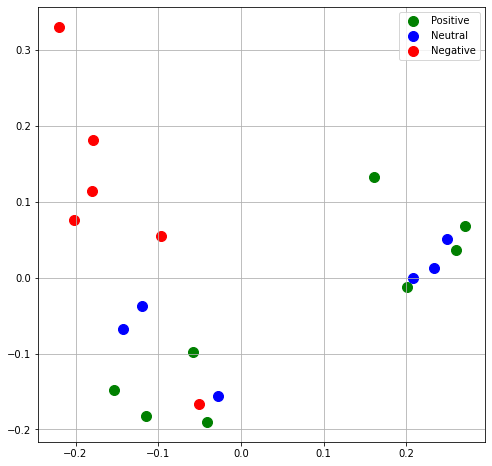

In [183]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['Positive', 'Neutral', 'Negative']
colors = ['g', 'b', 'r']

for target, color in zip(targets,colors):
    indicesToKeep = df_kw2['sentiment'] == target
    ax.scatter(df_kw2.loc[indicesToKeep, 'c1']
               , df_kw2.loc[indicesToKeep, 'c2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()